<a href="https://colab.research.google.com/github/adenugroho/Mchn-Learning/blob/main/Praktikum_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [3]:
train1 = pd.read_csv('/content/drive/MyDrive/Kuliah 23/Semester 3/Machine Learning/student-mat.csv')
train2 = pd.read_csv('/content/drive/MyDrive/Kuliah 23/Semester 3/Machine Learning/student-por.csv')

In [4]:
train1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Kuliah 23/Semester 3/Machine Learning/students.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portuguese


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Kuliah 23/Semester 3/Machine Learning/students.csv')
data.head()
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good'
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory'
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor'
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure'
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,Portuguese,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,Portuguese,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,Portuguese,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,Portuguese,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,Portuguese,Satisfactory


In [8]:
# label encode final_grade
le = preprocessing.LabelEncoder()
data.FinalGrade = le.fit_transform(data.FinalGrade)

In [9]:
X = data.drop(labels=['FinalGrade','G3'],axis=1)

y = data.FinalGrade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [10]:
# get dummy varibles
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [11]:
len(list(X_train))


60

In [12]:
X_train


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_Maths,subject_Portuguese
675,15,2,2,1,1,0,4,2,2,1,...,0,1,0,1,0,1,1,0,1,0
140,17,3,4,3,2,0,5,4,5,2,...,0,1,0,1,1,0,1,0,0,1
150,15,3,3,1,2,0,1,3,2,2,...,1,0,0,1,1,0,0,1,0,1
525,17,4,4,1,3,0,4,4,3,1,...,0,1,0,1,0,1,1,0,0,1
453,16,1,2,1,3,1,1,3,2,1,...,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,16,3,2,1,1,0,5,4,3,1,...,1,0,0,1,0,1,1,0,0,1
336,18,4,2,1,2,0,4,3,2,1,...,0,1,0,1,0,1,0,1,0,1
848,16,4,4,1,2,0,4,5,2,1,...,0,1,0,1,0,1,1,0,1,0
425,15,1,1,1,1,1,4,1,3,1,...,0,1,0,1,1,0,0,1,0,1


In [13]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.8314176245210728 , Cross Validation Score : 0.8065134099616859


In [14]:
# find a good # of estimators


ne=[]
for i in range(1,61):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

12    0.808429
dtype: float64

In [15]:
# find a good # of min_samples_leaf


ne=[]
for i in range(1,60):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

2    0.787356
dtype: float64

In [16]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 0.9789272030651341 , Cross Validation Score : 0.7950191570881227


In [17]:
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.8065134099616859 , Cross Validation Score : 0.7681992337164751


In [18]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)


In [19]:
# find optimal # of features to use in the model


ks=[]
for i in range(1,61):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)

ks = pd.Series(ks)
ks = ks.reindex(list(range(1,61)))
ks

1     0.839080
2     0.819923
3     0.808429
4     0.816092
5     0.383142
6     0.348659
7     0.316092
8     0.281609
9     0.262452
10    0.321839
11    0.308429
12    0.310345
13    0.312261
14    0.308429
15    0.203065
16    0.212644
17    0.187739
18    0.088123
19    0.070881
20    0.101533
21    0.128352
22    0.149425
23    0.137931
24    0.521073
25    0.522989
26    0.492337
27    0.486590
28    0.787356
29    0.793103
30    0.450192
31    0.448276
32    0.444444
33    0.457854
34    0.461686
35    0.076628
36    0.076628
37    0.070881
38    0.072797
39    0.045977
40    0.045977
41    0.091954
42    0.128352
43    0.047893
44    0.049808
45    0.045977
46    0.045977
47    0.063218
48    0.063218
49    0.070881
50    0.078544
51    0.063218
52    0.067050
53    0.067050
54    0.421456
55    0.438697
56    0.432950
57    0.810345
58    0.128352
59    0.775862
60         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

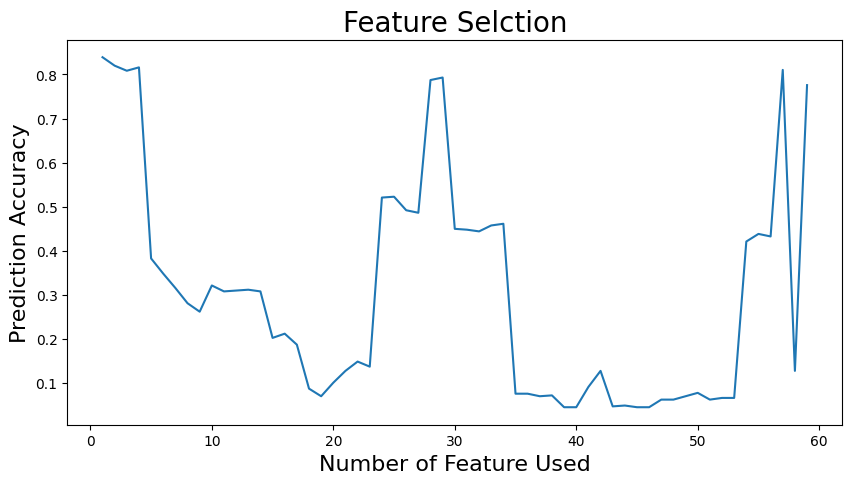

In [20]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [21]:
ks.where(ks==ks.max()).dropna()


1    0.83908
dtype: float64

In [22]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.8467432950191571 , Cross Validation Score : 0.3160919540229885


In [23]:
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.764367816091954 , Cross Validation Score : 0.7835249042145593


In [24]:
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.7413793103448276 , Cross Validation Score : 0.6206896551724138


In [25]:
from xgboost import XGBClassifier
from xgboost import plot_importance
def XGBoost(x_train,y_train,x_val,y_val):
    model = XGBClassifier()
    model = XGBClassifier(learning_rate=0.1,n_estimators=100)
    mf = model.fit(x_train,y_train)
    y_pred=model.predict(x_val)
    y_predict = mf.predict_proba(x_val)
    print("XGBoost Train data Score" , ":" , mf.score(x_train, y_train)
          , "," ,"Validation data Score" ,":" , mf.score(x_val, y_val))


    # plot feature importance
    fig, ax = plt.subplots(figsize=(10, 20))
    plot_importance(model, ax=ax)

    plt.show()
    return model

XGBoost Train data Score : 1.0 , Validation data Score : 0.8199233716475096


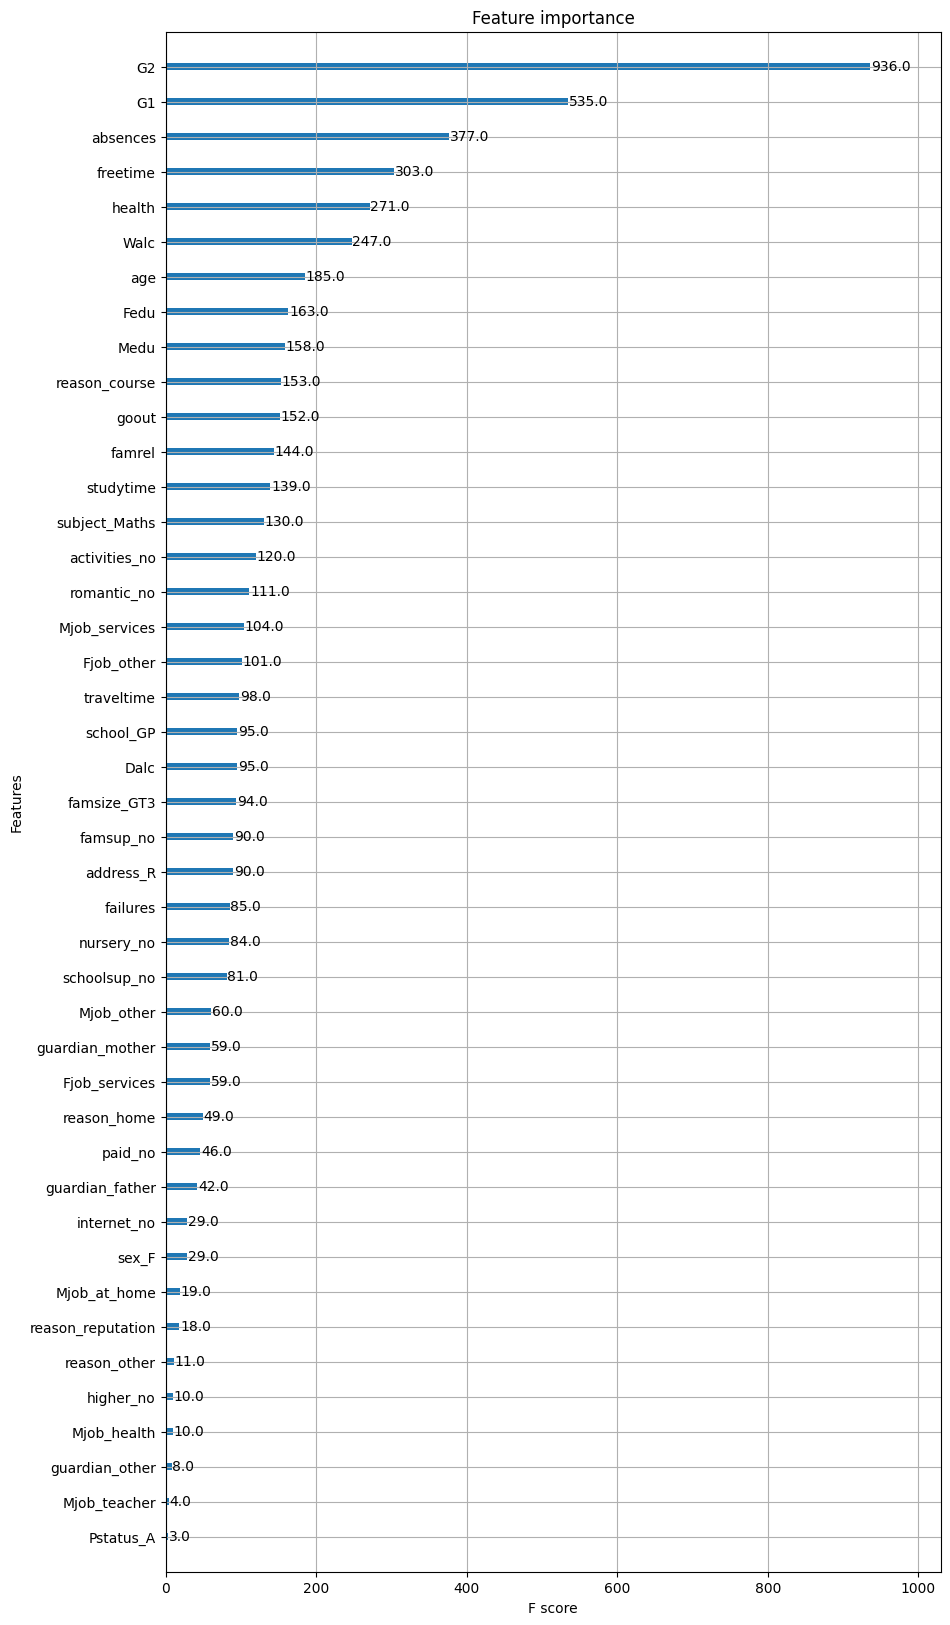

In [26]:
model = XGBoost(X_train,y_train,X_test,y_test)